In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/CSV File/training.1600000.processed.noemoticon.csv"
df = pd.read_csv(path)

print("Clean data loaded")
print(df.shape)
df

Clean data loaded
(1596303, 2)


,target,clean_text
0,0,a thats a bummer you shoulda got david carr of...
1,0,is upset that he cant update his facebook by t...
2,0,i dived many times for the ball managed to sav...
3,0,my whole body feels itchy and like its on fire
4,0,no its not behaving at all im mad why am i her...
...,...,...
1596298,1,just woke up having no school is the best feel...
1596299,1,thewdbcom very cool to hear old walt interviews
1596300,1,are you ready for your mojo makeover ask me fo...
1596301,1,happy th birthday to my boo of alll time tupac...


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['target'], test_size=0.2, random_state=42, stratify=df['target']
)

In [ ]:
X_train.shape

(1277042,)

In [ ]:
X_test.shape

(319261,)

In [ ]:
y_train.shape

(1277042,)

In [ ]:
y_test.shape

(319261,)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1,2),
    stop_words='english'
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
X_train_vec.shape

(1277042, 10000)

In [ ]:
X_test_vec.shape

(319261, 10000)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.75      0.77    159664
           1       0.76      0.80      0.78    159597

    accuracy                           0.77    319261
   macro avg       0.77      0.77      0.77    319261
weighted avg       0.77      0.77      0.77    319261



In [ ]:
import os

os.makedirs('/content/drive/MyDrive/CSV File/twitter_sentiment_models', exist_ok=True)
os.makedirs('/content/drive/MyDrive/CSV File/twitter_sentiment_project/models', exist_ok=True)

print("Folders created successfully!")


Folders created successfully!


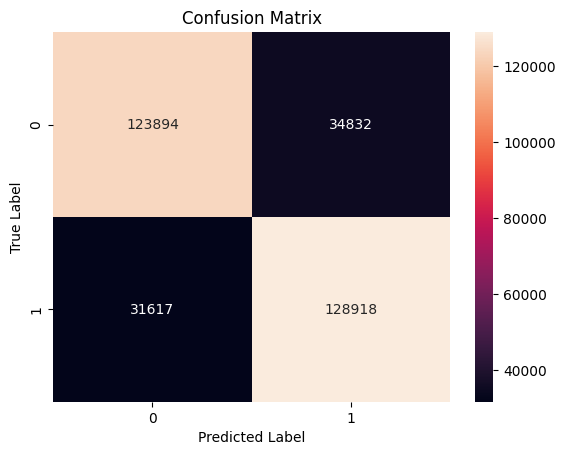

['/content/drive/MyDrive/CSV File/twitter_sentiment_project/models/tfidf.pkl']

In [ ]:
from sklearn.model_selection import train_test_split

X = df['clean_text']      # correct column
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

# Prediction
y_pred = model.predict(X_test_tfidf)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

sns.heatmap(cm, annot=True, fmt='d', xticklabels=['0','1'], yticklabels=['0','1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

import joblib
joblib.dump(model, '/content/drive/MyDrive/CSV File/twitter_sentiment_models/log_reg.pkl')
joblib.dump(vectorizer, '/content/drive/MyDrive/CSV File/twitter_sentiment_project/models/tfidf.pkl')


In [ ]:
sample_text = ["i love this!", "this is terrible", "it's okay, nothing special"]
sample_vec = vectorizer.transform(sample_text)
print(model.predict(sample_vec))


[1 0 1]
